<a href="https://colab.research.google.com/github/YashChaudhary16/PyTorch/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn

import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## Get a Dataset

In [5]:
# Setup training data

train_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=False,
    download=True,
    transform=ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.04MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.80MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Check Data

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
image, label = train_data[0]

In [10]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [15]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [16]:
classes = train_data.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
class_labels = train_data.class_to_idx
class_labels

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Plot the image

Image Shape: torch.Size([1, 28, 28])
Label: 9 (Ankle boot)


Text(0.5, 1.0, 'Ankle boot')

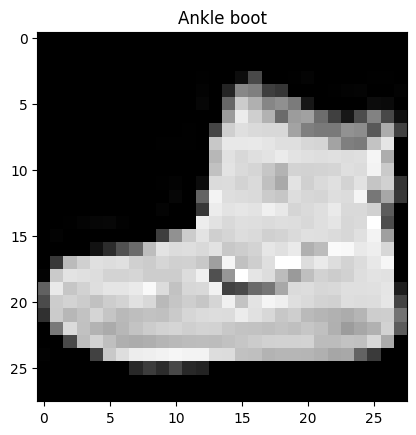

In [22]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
print(f"Label: {label} ({classes[label]})")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{classes[label]}")

## Prepare DataLoader

In [25]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [26]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x789be743de90>,
 <torch.utils.data.dataloader.DataLoader at 0x789be743d890>)

In [28]:
# Let's check the instances of dataloader

print(f"DataLoader: {train_dataloader}\n")
print(f"Length of train dataloader: {len(train_dataloader)} batches of 32\n")
print(f"Type of train dataloader: {type(train_dataloader)}\n")

DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x789be743de90>

Length of train dataloader: 1875 batches of 32

Type of train dataloader: <class 'torch.utils.data.dataloader.DataLoader'>



In [29]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape: torch.Size([1, 28, 28])
Label: tensor([3]) (Dress)


(-0.5, 27.5, 27.5, -0.5)

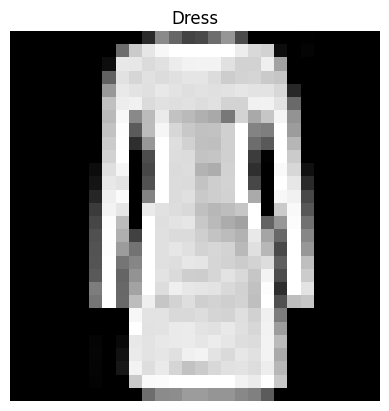

In [30]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1])
img, lbl = train_features_batch[random_idx][0], train_labels_batch[random_idx]
print(f"Image Shape: {img.shape}")
print(f"Label: {lbl} ({classes[lbl]})")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"{classes[lbl]}")
plt.axis(False)